# Introduction to Text Classification
# Session 1: Text Classification Workflow using Python

## 1. Overview Text Classification

Text classification is the process of assigning predefined categories to text data. It has a wide range of applications:
- Spam filtering: Automatically detecting spam emails.
- Sentiment analysis: Classifying whether a review is positive or negative.
- Topic categorization: Categorizing news articles based on their content.

### Key Python Libraries
- **Pandas**: Used for data handling and manipulation.
- **NLTK**: The Natural Language Toolkit for text preprocessing.
- **Scikit-learn**: A machine learning library for text classification.

In this workshop, we will guide you through the following steps:
1. Preprocessing text data.
2. Building a text classification model using machine learning.

In [1]:
# !pip install -r requirements.txt
# !python -m spacy download en_core_web_sm

In [2]:
# Import Necessary Libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/a0s0j0u/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a0s0j0u/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/a0s0j0u/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

## Text Pre-processing Pipeline Creation

# Workflow 1: Part I: Text Preprocessing

## Step I : Importing Text Data
-  Tabular Data : .csv, SQL, BigQuery
-  JSON  : Web Scrapping / APIs 
-  Plain Text Files:  Unstructured Large Corpora

In [4]:
# Import Tabular Text Data (Csv) using Pandas
# Example: Loading a dataset of customer reviews
df = pd.read_csv("/Users/a0s0j0u/Documents/Personal Management/workshop_content/workshop1_text_classification/data/article_text_classification.csv")
print(df.shape)
df.head()

(2225, 2)


text actual_label_text
0  Budget to set scene for election\n \n Gordon B...          Politics
1  Army chiefs in regiments decision\n \n Militar...          Politics
2  Howard denies split over ID cards\n \n Michael...          Politics
3  Observers to monitor UK election\n \n Minister...          Politics
4  Kilroy names election seat target\n \n Ex-chat...          Politics

In [5]:
# Getting Json Data using requests from a URL
import requests

# URL of the API endpoint
api_url = " https://jsonplaceholder.typicode.com/users"

# Make a request to the API
response = requests.get(api_url)

# Load the JSON response
api_data = response.json()

# Convert it into a pandas DataFrame
json_df = pd.DataFrame(api_data)

# Display the first few rows
json_df.head()


id              name   username                      email  \
0   1     Leanne Graham       Bret          Sincere@april.biz   
1   2      Ervin Howell  Antonette          Shanna@melissa.tv   
2   3  Clementine Bauch   Samantha         Nathan@yesenia.net   
3   4  Patricia Lebsack   Karianne  Julianne.OConner@kory.org   
4   5  Chelsey Dietrich     Kamren   Lucio_Hettinger@annie.ca   

                                             address                  phone  \
0  {'street': 'Kulas Light', 'suite': 'Apt. 556',...  1-770-736-8031 x56442   
1  {'street': 'Victor Plains', 'suite': 'Suite 87...    010-692-6593 x09125   
2  {'street': 'Douglas Extension', 'suite': 'Suit...         1-463-123-4447   
3  {'street': 'Hoeger Mall', 'suite': 'Apt. 692',...      493-170-9623 x156   
4  {'street': 'Skiles Walks', 'suite': 'Suite 351...          (254)954-1289   

         website                                            company  
0  hildegard.org  {'name': 'Romaguera-Crona', 'catchPhrase': 'Mu...  
1  anastasia.net  {'name': 'Deckow-Crist', 'catchPhrase': 'Proac...  
2    ramiro.info  {'name': 'Romaguera-Jacobson', 'catchPhrase': ...  
3       kale.biz  {'name': 'Robel-Corkery', 'catchPhrase': 'Mult...  
4   demarco.info  {'name': 'Keebler LLC', 'catchPhrase': 'User-c...

In [6]:
# Load a single plain text file
with open('/Users/a0s0j0u/Documents/Personal Management/workshop_content/workshop1_text_classification/data/sample1.txt', 'r') as file:
    text_data = file.read()

# Display first 500 characters of the text
print(text_data[:500])

Did you hear about the blind carpenter who picked up his hammer and saw?

Did you hear about the deaf shepherd who gathered his flock and heard (herd)?

If you don't understand these, use your dictionary and look up the words "blind," "deaf," "saw," "heard" and "herd."

A teacher is talking to a student.
Teacher: Did your father help you with your homework?
Student: No, he did it all by himself.

On a crowded bus, one man noticed that another man had his eyes closed.
"What's the matter? Are you 


## Step II: Text Data Cleaning Pipeline:
Clean and preprocess text data for use in text classification models.
We will use tools such as:
- NLTK for tokenization, stopword removal
- Regex for URL Removal, Special Character Removal and Punctuation Removal

## Step III: Word Tokenization and Lemmatization:
- Scikit-learn's TF-IDF Vectorizer to transform text into numerical data.

In [7]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Creating Text Cleaning Pipeline
# 1. Function to lowercase text
def lowercase_text(text):
    return text.lower()

# 2. Function to remove punctuation
def remove_punctuation(text, punctuations_to_remove="!?'"):
    # Create a regular expression pattern to match the specified punctuation characters
    pattern = f'[{re.escape(punctuations_to_remove)}]'
    return re.sub(pattern, '', text)

# 3. Function to remove special characters and encoding issues
def remove_special_characters(text):
    # This pattern removes non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Optional: remove any lingering unwanted characters or patterns
    return re.sub(r'[^\w\s]', '', text)

# 4. Function to remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

# 5. Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in word_tokenize(text) if word not in stop_words])

# 6. Function for tokenization
def tokenize_text(text):
    return word_tokenize(text)

# 7. Function for lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# 8. Function to remove extra whitespace
def remove_extra_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

# Sample dataset
data = {
    'text_column': [
        "I love this product! 100% satisfied. Check out http://example.com",
        "Worst product ever!. Waste of money. @username",
        "Amazing! Would buy again. 5 stars. www.shop.com",
        "The product is good but could be better. Check @official_website"
    ]
}

df_sample_demo = pd.DataFrame(data)

# Apply the cleaning functions in sequence to each row
def clean_text_pipeline(text):
    text = lowercase_text(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    tokens = tokenize_text(text)
    tokens = lemmatize_tokens(tokens)
    text = ' '.join(tokens)
    text = remove_extra_whitespace(text)
    return text

# Apply the cleaning pipeline function to the dataset
df_sample_demo['cleaned_text'] = df_sample_demo['text_column'].apply(clean_text_pipeline)

# Display the cleaned text
pd.set_option('display.max_colwidth', 5000)
df_sample_demo[['text_column', 'cleaned_text']].head()

text_column  \
0  I love this product! 100% satisfied. Check out http://example.com   
1                     Worst product ever!. Waste of money. @username   
2                    Amazing! Would buy again. 5 stars. www.shop.com   
3   The product is good but could be better. Check @official_website   

                                       cleaned_text  
0                  love product 100 satisfied check  
1           worst product ever waste money username  
2                          amazing would buy 5 star  
3  product good could better check official_website

In [8]:
# Applying above Text cleaning pipeline to text column of Aricles Data
def clean_text_pipeline(text):
    text = lowercase_text(text)
    text = remove_punctuation(text, "!?'√Çç¬'-")
    text = remove_urls(text)
    text = remove_stopwords(text)
    tokens = tokenize_text(text)
    tokens = lemmatize_tokens(tokens)
    text = ' '.join(tokens)
    text = remove_extra_whitespace(text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text_pipeline)
print(df.shape)
df.head()

(2225, 3)


text  \
0   Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from √Ç¬£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about √Ç¬£2bn to spare.\n \n - Increase in the stamp duty threshold from √Ç¬£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than √Ç¬£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to √Ç¬£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a "classic Labour stealth tax". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: "Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole," he said. "If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around √Ç¬£10bn."\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a √Ç¬£35bn difference in investment by the end of the next parliament between the two main parties. He added: "I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments."\n \n For the Lib Dems David Laws said: "The chancellor will no doubt tell us today how wonderfully the economy is doing," he said. "But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way." SNP leader Alex Salmond said his party would introduce a √Ç¬£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to √Ç¬£5.60 an hour.\n   
1                                                                                                                                                     Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. Whe

In [9]:
# Target Encoding for Multi-class
target_classes = sorted(list(set(df.actual_label_text)))
label2id = {x: idx for idx, x in enumerate(target_classes)}
id2label = {idx: x for x, idx in label2id.items()}

print(target_classes)
print(label2id)
print(id2label)

['Business', 'Entertainment', 'Politics', 'Sport', 'Technology']
{'Business': 0, 'Entertainment': 1, 'Politics': 2, 'Sport': 3, 'Technology': 4}
{0: 'Business', 1: 'Entertainment', 2: 'Politics', 3: 'Sport', 4: 'Technology'}


In [10]:
# show column names
print("df.columns: ", df.columns) 

df.columns:  Index(['text', 'actual_label_text', 'cleaned_text'], dtype='object')


## Text Data EDA: Visualization

### Part I Target Distribution:
Histogram to depict the target class distribution

In [11]:
# Count by Type of Aricle
fig = px.histogram(df,
             x = 'actual_label_text',
             color= 'actual_label_text',
             title = 'Histogram of Article Type'
            )

fig.update_yaxes(title='Count')
fig.show()

In [12]:
# encode label and mapping label name
df["label"] = df["actual_label_text"].map(label2id)
print(df.shape)
df.label.value_counts()

(2225, 4)


label
3    511
0    510
2    417
4    401
1    386
Name: count, dtype: int64

### Part II: Word Cloud to Visualise Important Words by Label Type
Using wordcloud library and pandas to filter relevant class and see the corresponding word cloud

In [13]:
def show_wordcloud(data, label_column, label_value, title=None):
    # Filter data based on the specified label
    filtered_data = data[data[label_column] == label_value]['text']
    
    # Join the text data into a single string
    text = " ".join(filtered_data)
    
    # Generate the word cloud
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
    ).generate(text)
    
    # Plot the word cloud
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()



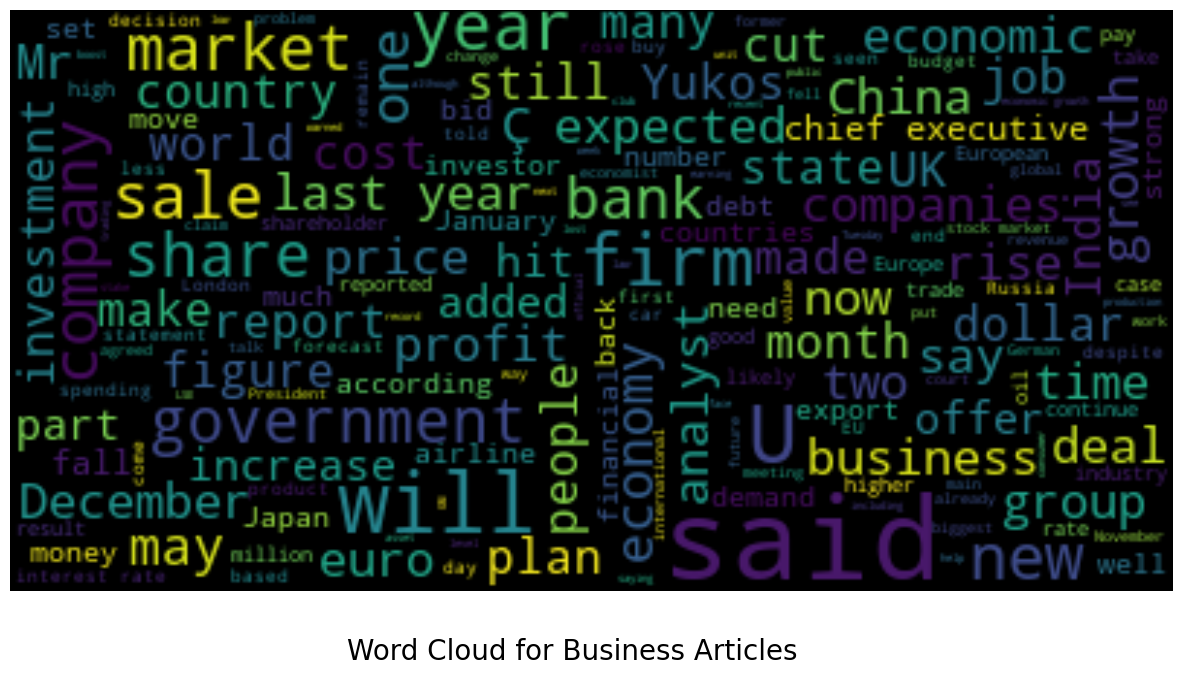

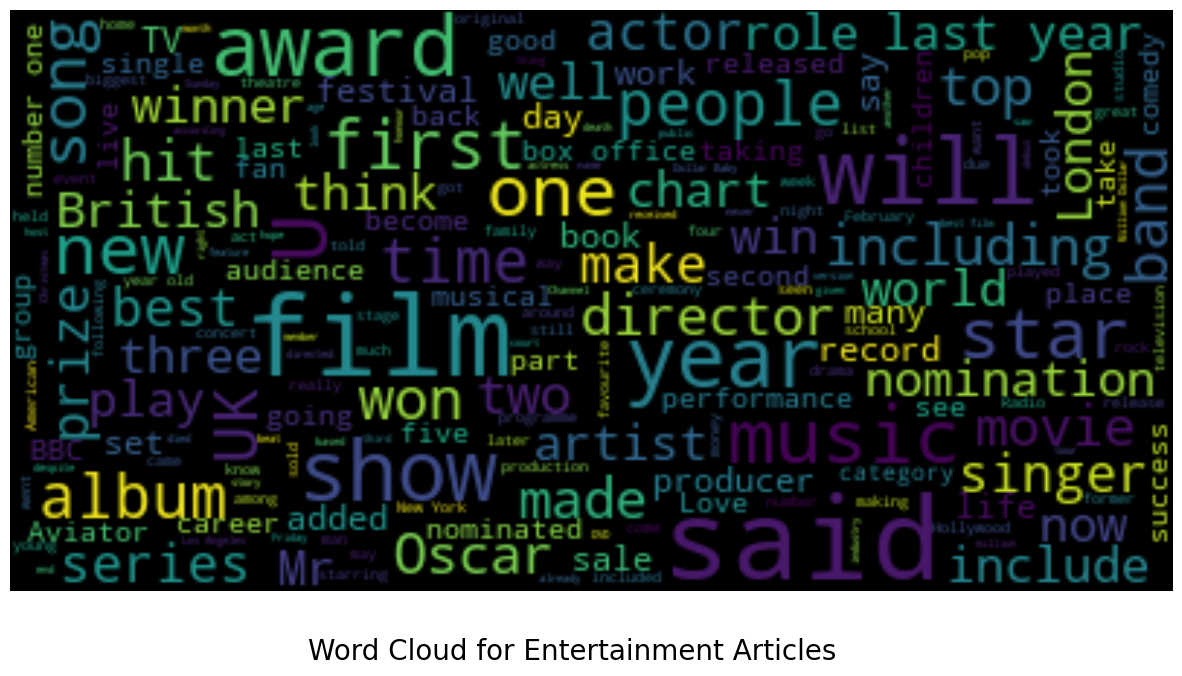

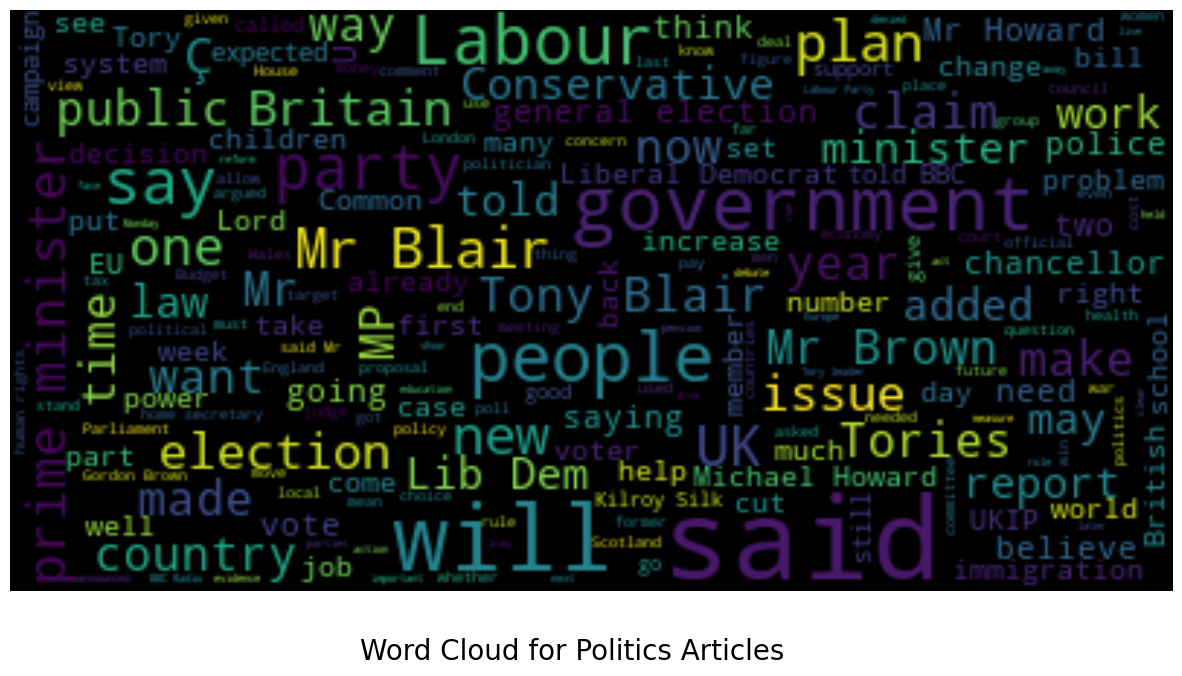

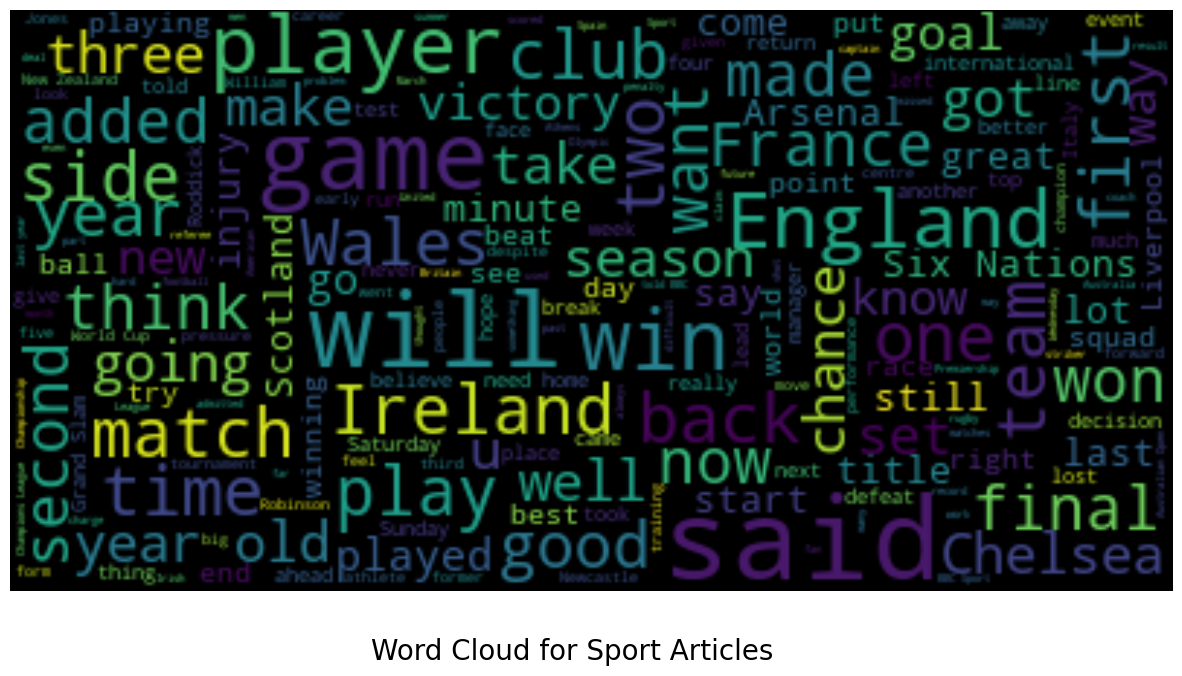

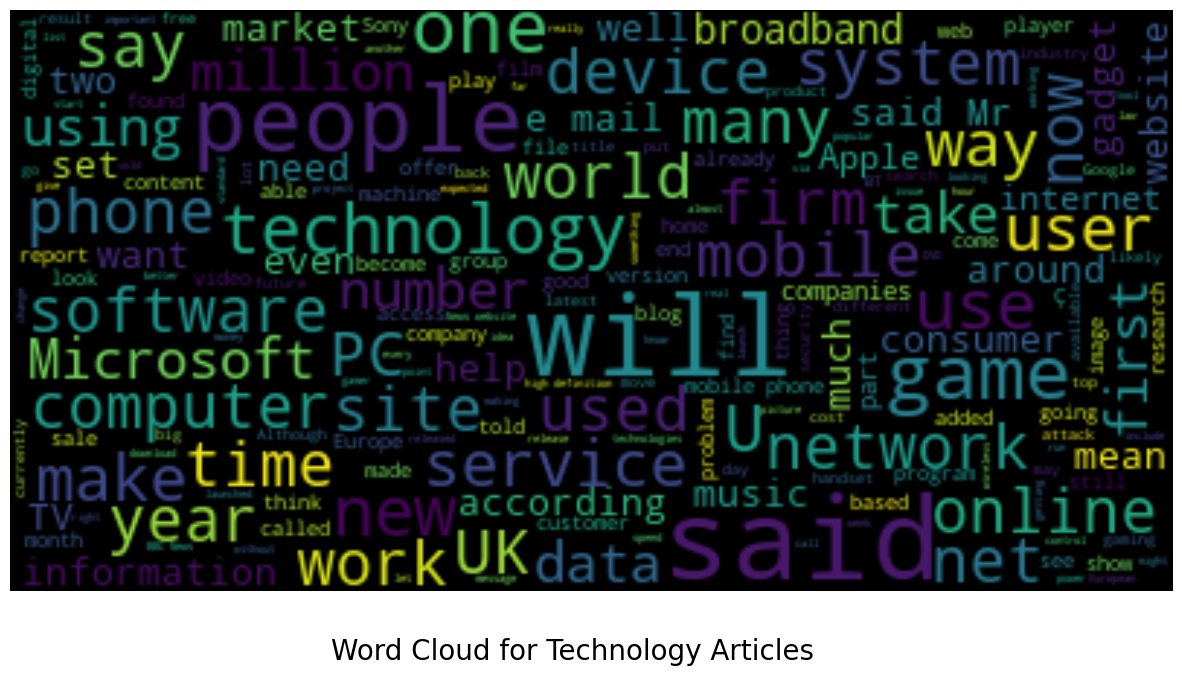

In [14]:
# Example usage
# Assuming `df` is your DataFrame with 'label' and 'text' columns
for label_val in target_classes:
    show_wordcloud(df, label_column='actual_label_text', label_value= label_val, title=f'Word Cloud for {label_val} Articles')

## Convert to Numeric Features 

- Bag of Words (Count Vectorizer): 

This counts how often each word appears in the text.

- TF-IDF (Term Frequency-Inverse Document Frequency): 

This gives a score to each word based on how important it is. Words that are common in many texts get lower scores, while words unique to a specific text get higher scores.



In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your DataFrame
# Create CountVectorizer instance
count_vectorizer = CountVectorizer()

# Fit and transform the cleaned_text column
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

# Convert the result to a DataFrame for better visualization
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

print("Bag of Words (Count Vectorizer) Representation:")
print(count_df.shape)
count_df.head()


Bag of Words (Count Vectorizer) Representation:
(2225, 29613)


00  000  0001  000300  000acre  000ayear  000bn  000m  000s  000seat  ...  \
0   0    5     0       0        0         0      0     0     0        0  ...   
1   0    0     0       0        0         0      0     0     0        0  ...   
2   0    0     0       0        0         0      0     0     0        0  ...   
3   0    0     0       0        0         0      0     0     0        0  ...   
4   0    0     0       0        0         0      0     0     0        0  ...   

   zoom  zooropa  zornotza  zorro  zubair  zuluaga  zurich  zutons  zvonareva  \
0     0        0         0      0       0        0       0       0          0   
1     0        0         0      0       0        0       0       0          0   
2     0        0         0      0       0        0       0       0          0   
3     0        0         0      0       0        0       0       0          0   
4     0        0         0      0       0        0       0       0          0   

   zvyagintsev  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 29613 columns]

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned_text column
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert the result to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Representation:")
print(tfidf_df.shape)
tfidf_df.head()

TF-IDF Representation:
(2225, 29613)


00       000  0001  000300  000acre  000ayear  000bn  000m  000s  000seat  \
0  0.0  0.105189   0.0     0.0      0.0       0.0    0.0   0.0   0.0      0.0   
1  0.0  0.000000   0.0     0.0      0.0       0.0    0.0   0.0   0.0      0.0   
2  0.0  0.000000   0.0     0.0      0.0       0.0    0.0   0.0   0.0      0.0   
3  0.0  0.000000   0.0     0.0      0.0       0.0    0.0   0.0   0.0      0.0   
4  0.0  0.000000   0.0     0.0      0.0       0.0    0.0   0.0   0.0      0.0   

   ...  zoom  zooropa  zornotza  zorro  zubair  zuluaga  zurich  zutons  \
0  ...   0.0      0.0       0.0    0.0     0.0      0.0     0.0     0.0   
1  ...   0.0      0.0       0.0    0.0     0.0      0.0     0.0     0.0   
2  ...   0.0      0.0       0.0    0.0     0.0      0.0     0.0     0.0   
3  ...   0.0      0.0       0.0    0.0     0.0      0.0     0.0     0.0   
4  ...   0.0      0.0       0.0    0.0     0.0      0.0     0.0     0.0   

   zvonareva  zvyagintsev  
0        0.0          0.0  
1        0.0          0.0  
2        0.0          0.0  
3        0.0          0.0  
4        0.0          0.0  

[5 rows x 29613 columns]

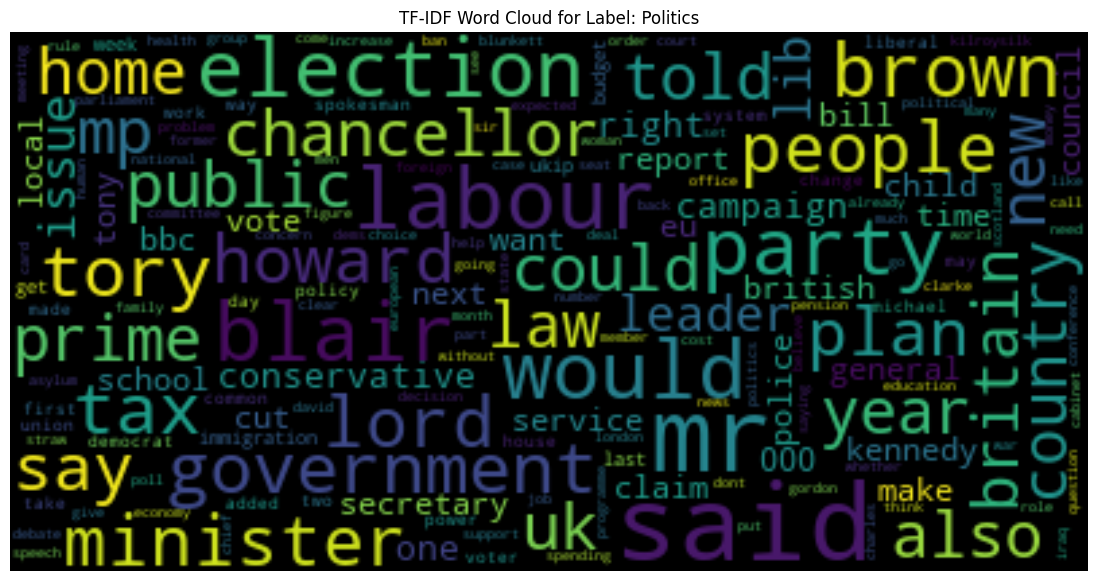

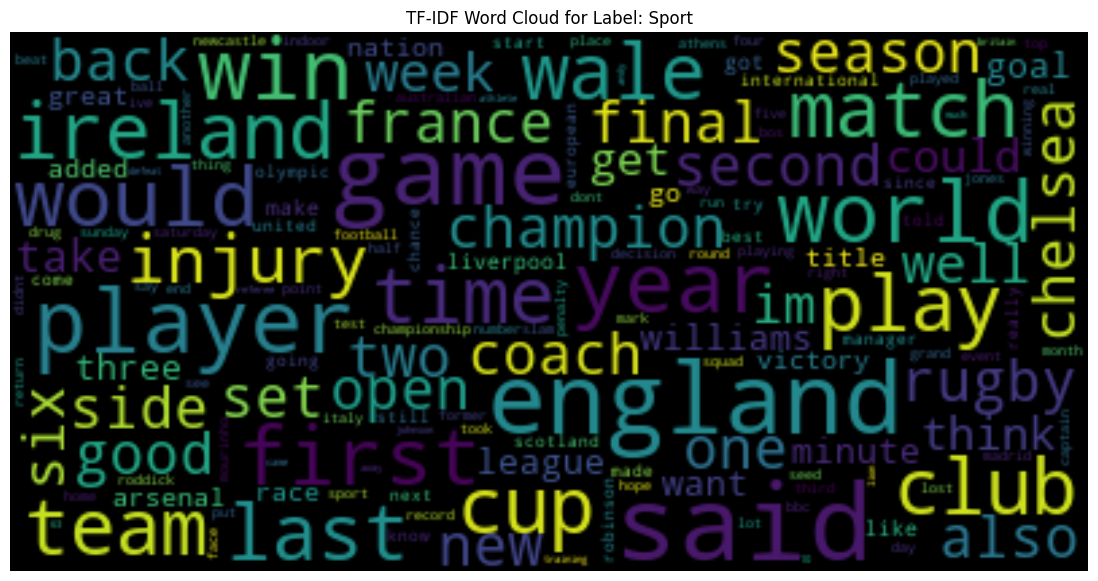

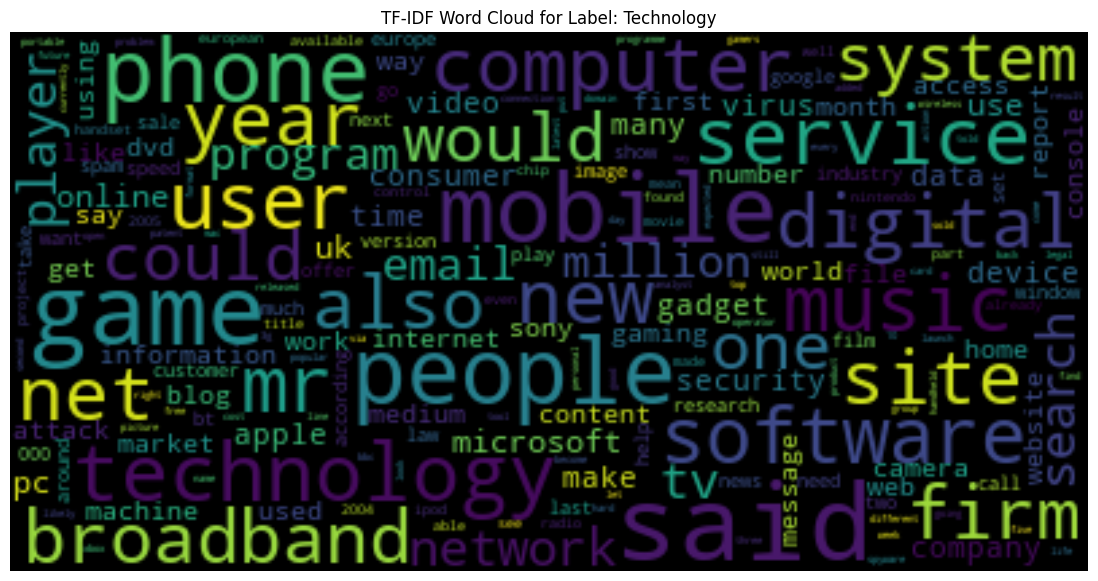

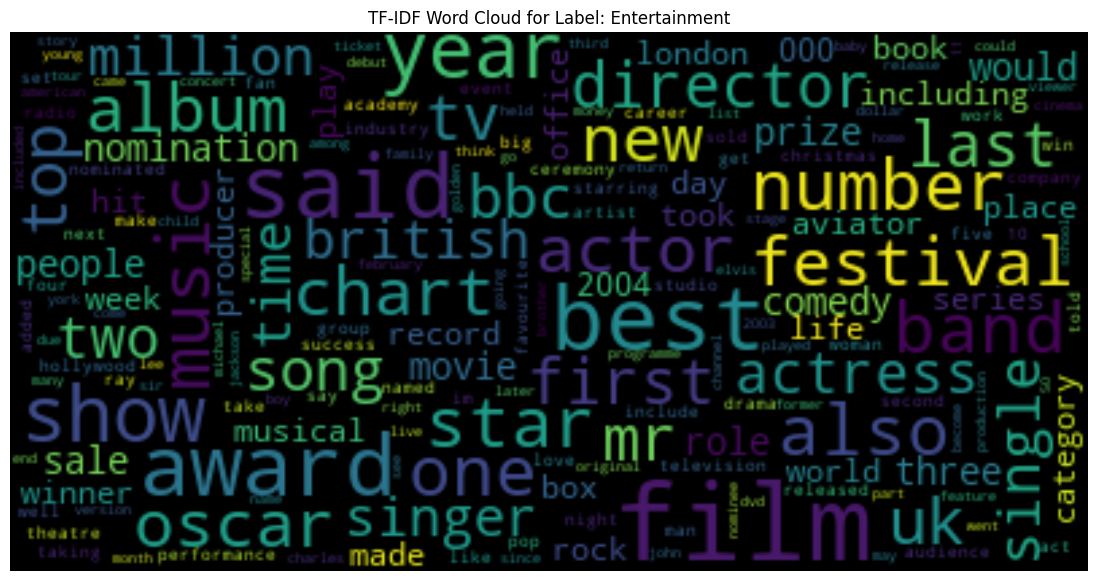

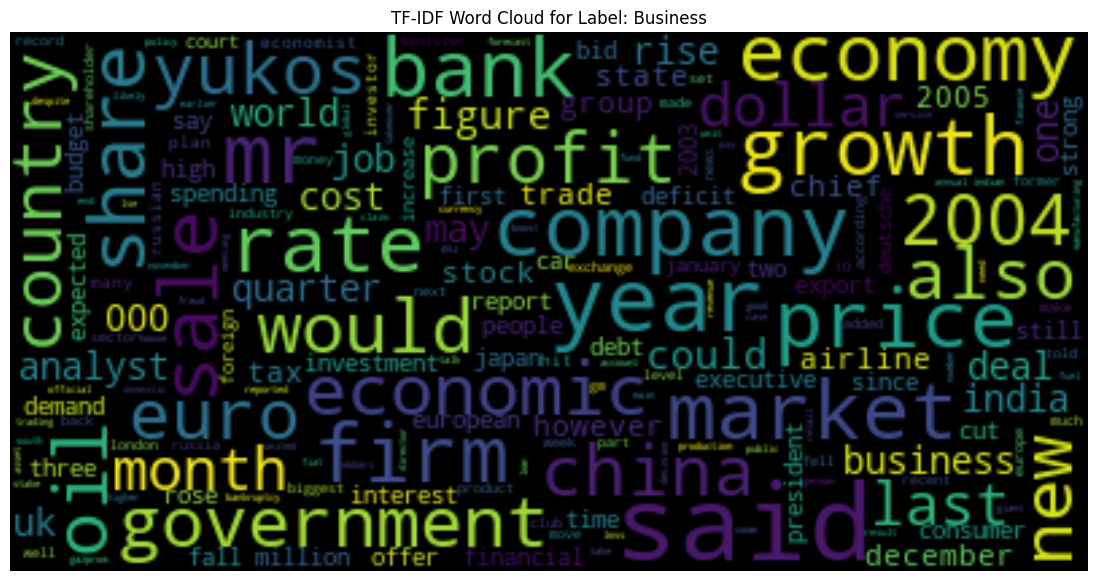

In [17]:
# Visualize the important words identified by TFIDF

def show_tfidf_wordcloud_by_label(df, text_column, label_column):
    # Get unique labels
    labels = df[label_column].unique()
    
    for label in labels:
        # Filter data for the current label
        filtered_data = df[df[label_column] == label][text_column]
        
        # TF-IDF Vectorizer
        tfidf_vectorizer = TfidfVectorizer()
        X_tfidf = tfidf_vectorizer.fit_transform(filtered_data)
        
        # Extract feature names and scores
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_scores = X_tfidf.sum(axis=0).A1  # Sum of scores for each feature (word)
        word_scores = dict(zip(feature_names, tfidf_scores))
        
        # Generate the word cloud
        wordcloud = WordCloud(
            background_color='black',
            max_words=200,
            max_font_size=40, 
            scale=1,
            random_state=1
        ).generate_from_frequencies(word_scores)
        
        # Plot the word cloud
        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'TF-IDF Word Cloud for Label: {label}')
        plt.show()

# Example usage
# Assuming `df` is your DataFrame with 'cleaned_text' and 'label' columns
show_tfidf_wordcloud_by_label(df, text_column='cleaned_text', label_column='actual_label_text')


# Workflow Demo Part II: Text Classification using Scikit-learn

- Objective: Build and evaluate a text classification model.
- Steps:
    - Use the text pre-processing pipeline
    - Train-Test Split
    - Select Model from Scikit-learn to build a classification model (Logistic Regression, Naive Bayes, SVM).
    - Parameter Tuning 
    - Test Data Inference


In [18]:
import os
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Text Pre-Processing Function
def clean_text_pipeline(text):
    text = lowercase_text(text)
    text = remove_punctuation(text, "!?'√Çç¬'-")
    text = remove_urls(text)
    text = remove_stopwords(text)
    tokens = tokenize_text(text)
    tokens = lemmatize_tokens(tokens)
    text = ' '.join(tokens)
    text = remove_extra_whitespace(text)
    return text

# Define the pipeline
def create_pipeline(model):
    return Pipeline([
        ('tfidf', TfidfVectorizer(preprocessor=clean_text_pipeline)),
        ('classifier', model)
    ])

# Models and Parameters
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC()
}

param_grids = {
    'Naive Bayes': {},
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['actual_label_text'], test_size=0.3, random_state=42 , stratify=df['actual_label_text'])

# Train and Evaluate Models
for name, model in models.items():
    print(f"Training {name}...")
    
    pipeline = create_pipeline(model)
    param_grid = param_grids[name]
    
    # GridSearchCV for parameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    
    # Save the best model
    model_path = "/Users/a0s0j0u/Documents/Personal Management/workshop_content/workshop1_text_classification/model"
    os.makedirs(model_path, exist_ok=True)
    best_model_filename = f"{model_path}/best_model_{name.replace(' ', '_')}.pkl"
    joblib.dump(grid_search.best_estimator_, best_model_filename)
    print(f"Best model saved as {best_model_filename}")
    
    # Evaluate on test data
    y_pred = grid_search.predict(X_test)
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print("-" * 50)


Training Naive Bayes...
Best Parameters for Naive Bayes: {}
Best model saved as /Users/a0s0j0u/Documents/Personal Management/workshop_content/workshop1_text_classification/model/best_model_Naive_Bayes.pkl
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

     Business       0.95      0.97      0.96       153
Entertainment       0.99      0.87      0.93       116
     Politics       0.92      0.98      0.95       125
        Sport       0.97      1.00      0.99       154
   Technology       0.95      0.93      0.94       120

     accuracy                           0.96       668
    macro avg       0.96      0.95      0.95       668
 weighted avg       0.96      0.96      0.96       668

--------------------------------------------------
Training Logistic Regression...
Best Parameters for Logistic Regression: {'classifier__C': 10}
Best model saved as /Users/a0s0j0u/Documents/Personal Management/workshop_content/workshop1_text_classification/

In [22]:
# Example of loading a saved model and making predictions
def load_and_predict(model_filename, new_texts):
    model = joblib.load(model_filename)
    predictions = model.predict(new_texts)
    return predictions

# Load the best SVM model and make predictions
new_texts = [
    # Business
    "In today's competitive business environment, companies must innovate continuously to stay ahead. Effective leadership, strategic planning, and market analysis are crucial components. Organizations often focus on customer satisfaction, optimizing operations, and leveraging technology to enhance productivity and profitability. Successful businesses also invest in employee development and adapt to market changes.",
    
    # Technology
    "Technology is rapidly evolving, influencing every aspect of our lives. From artificial intelligence and machine learning to blockchain and quantum computing, the tech industry drives innovation. Companies are increasingly adopting cloud computing, cybersecurity measures, and advanced data analytics to stay competitive. The integration of technology into daily operations is reshaping industries.",
    
    # Sports
    "Sports play a vital role in promoting health and fostering community spirit. Major events like the Olympics and World Cup captivate audiences worldwide. Professional athletes train rigorously, employing advanced techniques and technologies to enhance performance. Team sports encourage collaboration and strategy, while individual sports highlight personal discipline and achievement.",
]


model_filename = '/Users/a0s0j0u/Documents/Personal Management/workshop_content/workshop1_text_classification/model/best_model_SVM.pkl'  # Replace with the actual filename
predictions = load_and_predict(model_filename, new_texts)
print(f"Predictions: {predictions}")

Predictions: ['Business' 'Technology' 'Sport']
